In [2]:
import nibabel as nib
import os
import matplotlib.pyplot as plt
import numpy as np

USING NIBABEL TO EXTRACT DATA FROM THE NIfTI FILE :

In [3]:
# Use just the filename if it's in the same folder
img = nib.load('sub-62038_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii')
data = img.get_fdata()

EXTRACTING METADATA FROM THE NIfTI FILE :

In [5]:
np.set_printoptions(precision = 3, suppress= True)
affine_matrix = img.affine
voxel_spacing = img.header.get_zooms()
data_type = img.get_data_dtype()
header = img.header

# Print results
print("Data shape:",data.shape)
print("Affine matrix:\n", affine_matrix)
print("Voxel spacing:", voxel_spacing)
print("Data type:", data_type)
print("Header keys:", header.keys())

Data shape: (256, 362, 384)
Affine matrix:
 [[   0.629   -0.013   -0.031  -73.605]
 [   0.016    0.622    0.059 -100.073]
 [   0.03    -0.06     0.621 -119.99 ]
 [   0.       0.       0.       1.   ]]
Voxel spacing: (np.float32(0.63), np.float32(0.625), np.float32(0.625))
Data type: int16
Header keys: ['sizeof_hdr', 'data_type', 'db_name', 'extents', 'session_error', 'regular', 'dim_info', 'dim', 'intent_p1', 'intent_p2', 'intent_p3', 'intent_code', 'datatype', 'bitpix', 'slice_start', 'pixdim', 'vox_offset', 'scl_slope', 'scl_inter', 'slice_end', 'slice_code', 'xyzt_units', 'cal_max', 'cal_min', 'slice_duration', 'toffset', 'glmax', 'glmin', 'descrip', 'aux_file', 'qform_code', 'sform_code', 'quatern_b', 'quatern_c', 'quatern_d', 'qoffset_x', 'qoffset_y', 'qoffset_z', 'srow_x', 'srow_y', 'srow_z', 'intent_name', 'magic']


PLOTTING STATIC VIEWS FOR CORONAL, SAGGITAL AND AXIAL VIEWS :

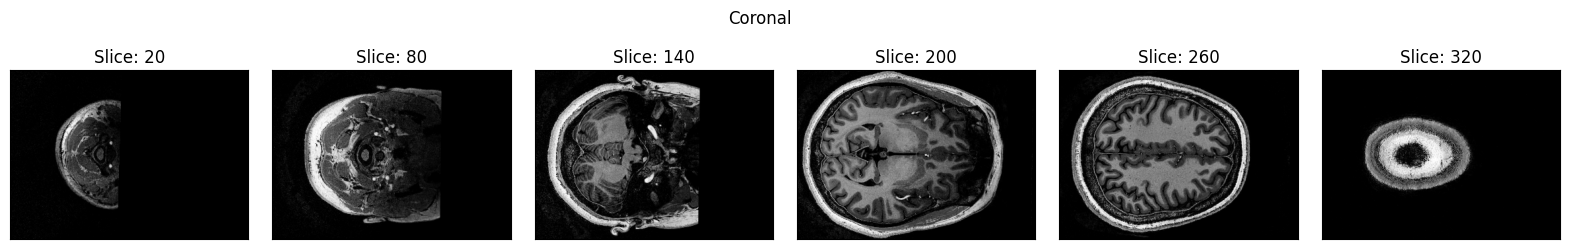

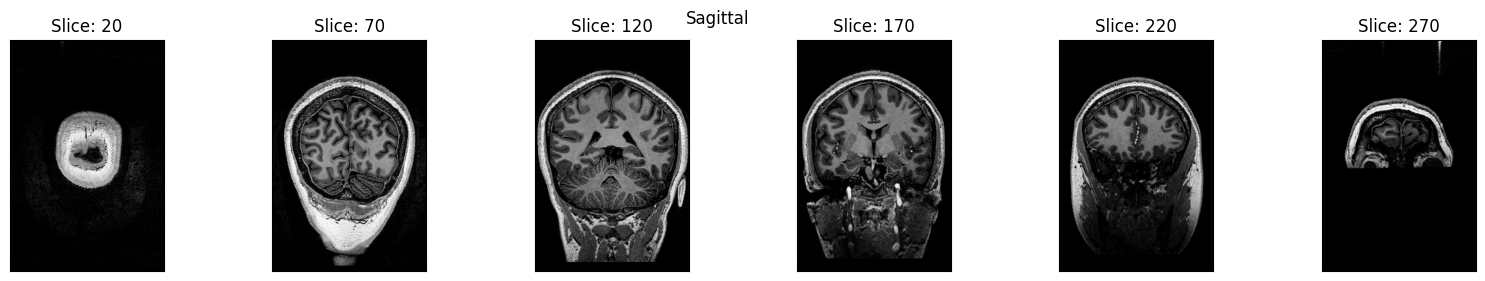

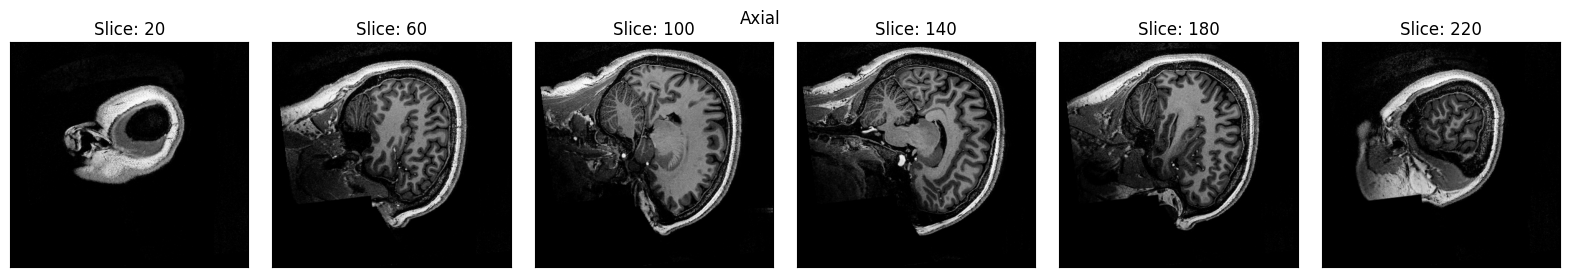

In [12]:
# ----- Coronal -----
fig, ax = plt.subplots(1, 6, figsize=[20, 3])
slice = 20
for n in range(6):
    ax[n].imshow(data[:, :, slice], cmap='gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title(f'Slice: {slice}')
    slice += 60
fig.suptitle("Coronal")
fig.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

# ----- Sagittal -----
fig, ax = plt.subplots(1, 6, figsize=[20, 3])
slice = 20
for n in range(6):
    ax[n].imshow(np.rot90(data[:, slice, :], 1), cmap='gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title(f'Slice: {slice}')
    slice += 50
fig.suptitle("Sagittal")
fig.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

# ----- Axial -----
fig, ax = plt.subplots(1, 6, figsize=[20, 3])
slice = 20
for n in range(6):
    ax[n].imshow(data[slice, :, :], cmap='gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title(f'Slice: {slice}')
    slice += 40
fig.suptitle("Axial")
fig.subplots_adjust(wspace=0.1, hspace=0)
plt.show()


The function implemented below is used to get real world coordinated from the voxel coordinates. We can also compute the reverse (i.e. voxel coordinaes from the real word coordinates and plot them on the Voxel Slices to visualise how the image is actually oriented in real world) 

In [10]:
def f(i, j, k):
    M = affine_matrix[:3, :3]
    abc = affine_matrix[:3, 3]
    return M.dot([i, j, k]) + abc


Running the following cell will show that the center of the image field of view is very close to the midline, and is around 25.6mm anterior the isocenter and around 8mm inferior the isocenter

In [11]:
vox_center = (np.array(data.shape) - 1) / 2.
f(vox_center[0], vox_center[1], vox_center[2])

array([-1.763, 25.608, -7.978])